<a href="https://colab.research.google.com/github/lfyamagawa/biblioteca/blob/master/FRL_CD_AM2_05_Tarefa2_LFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TAREFA 2: Análise do dataset Iris

- Dataset: Iris (disponível no Scikit-learn).
- Descrição: O dataset Iris contém 150 amostras de flores com 4 características (comprimento e largura das sépalas e pétalas). O objetivo é usar aprendizado não supervisionado para agrupar as flores em clusters naturais e visualizar os resultados.
- Tarefa:
- Carregue o dataset Iris diretamente do Scikit-learn.
- Aplique o k-means com k=3 ou 4 (use o método do cotovelo para decidir o número ideal de clusters).
Reduza as dimensões das 4 características para 2 usando PCA e visualize os clusters em um gráfico 2D.
- Compare a visualização com t-SNE, aplicando-o aos mesmos dados e plotando os clusters.
- Entrega: Um gráfico 2D com os clusters coloridos (um para PCA e outro para t-SNE) e uma breve interpretação dos resultados (ex.: "Cluster 1: flores com pétalas longas e largas; Cluster 2: flores pequenas").
- Link do formulário para entrega:
- https://forms.gle/2eZDkEtsDgwwCTRL9

In [11]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregar o dataset Iris
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()
X = iris.data # Dados (4 características, comprimento e largura das sépalas e pétalas)
y = iris.target # Tipos (apenas para comparação, não usaremos no clustering)

# Padronizar os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados carregados e padronizados!")

Dados carregados e padronizados!


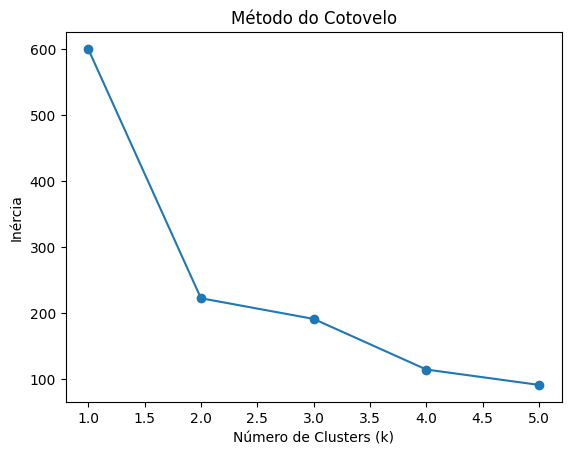

Explicação: 


In [23]:
# Aplicar K-means com k=3 (sabemos que há 3 classes no dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Método do cotovelo para escolher k
inertias = []
for k in range(1, 6):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

# Plotar o gráfico do cotovelo, que  mostra a inércia (soma das distâncias aos centroides) para diferentes valores de k.
plt.plot(range(1, 6), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

print("Explicação: ")

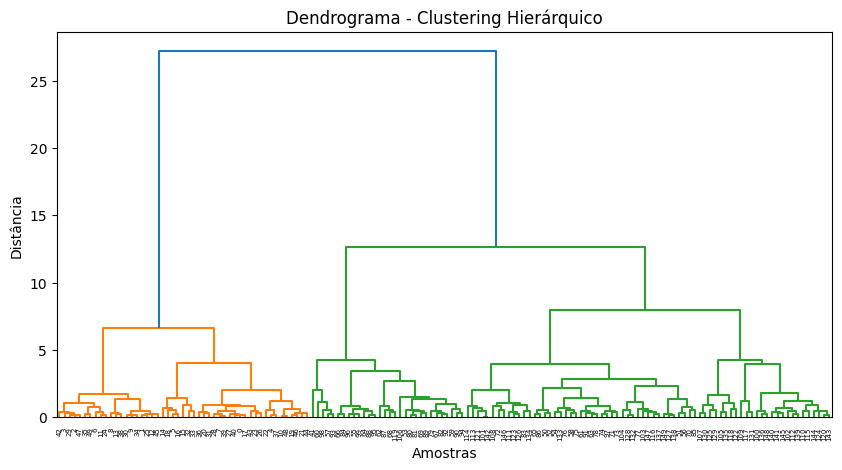

Explicação: 


In [24]:
# Calcular a matriz de ligação para clustering hierárquico (método Ward)
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma, que mostra como os pontos são agrupados.
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

print("Explicação: ")

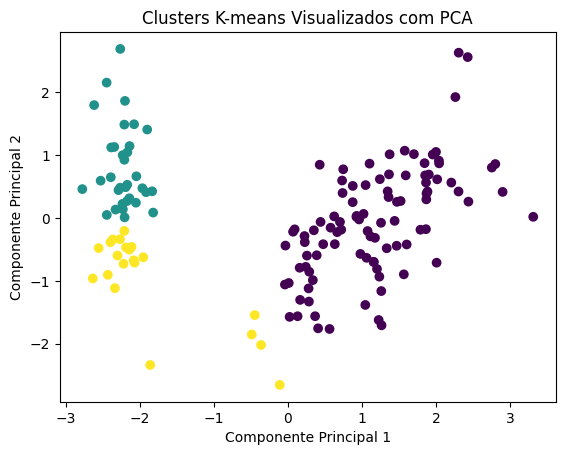

Variância explicada pelos 2 componentes: 95.81%
Explicação: 


In [25]:
# Aplicar PCA (Principal Component Analysis - Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters do k-means com PCA, que reduz os dados para 2D.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variância explicada pelos componentes
print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

print("Explicação: ")

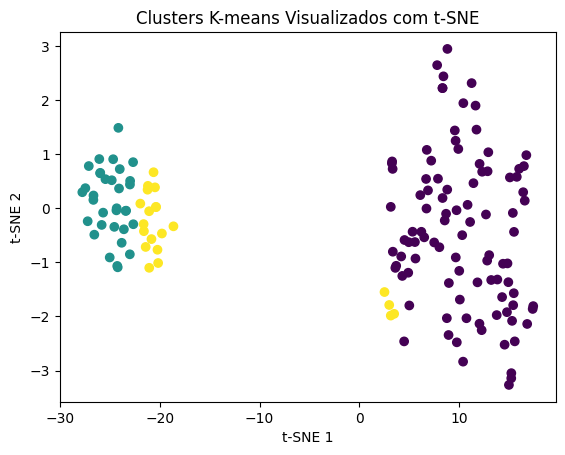

Explicação: 


In [26]:
# Aplicar t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters do k-means com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

print("Explicação: ")